# Toy model PHATE resting

In [2]:
import phate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.graph_objects as go
from Python_Scripts.Data_Selection import *
from Python_Scripts.Data_Selection_for_BD import *
from matplotlib.colors import ListedColormap

# Simple 3D data

In [3]:
# Generate toy data again
n = 1000
t = np.linspace(0, 1, n)
branch_1 = np.stack([t, t*0, t*0], axis=1)
branch_2 = np.stack([t, t, t*0], axis=1) + [1, 0, 0]
branch_3 = np.stack([t, -t, t*0], axis=1) + [1, 0, 0]
simple_3D = np.concatenate([branch_1, branch_2, branch_3], axis=0)
simple_3D += 0.05 * np.random.randn(*simple_3D.shape)

colors = np.linspace(0, 1, len(simple_3D))

fig = go.Figure(data=[go.Scatter3d(
    x=simple_3D[:, 0], y=simple_3D[:, 1], z=simple_3D[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=colors,
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(
    title='Interactive 3D Toy Differentiation Data',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)
fig.show()


In [4]:
phate_op = phate.PHATE(n_components=2)
X_phate = phate_op.fit_transform(simple_3D)

plt.figure(figsize=(6, 5))
plt.scatter(X_phate[:, 0], X_phate[:, 1], c=np.linspace(0, 1, len(simple_3D)), cmap='viridis')
plt.title("PHATE on Toy Differentiation Model")
plt.xlabel("PHATE1")
plt.ylabel("PHATE2")
plt.show()


Calculating PHATE...
  Running PHATE on 3000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.03 seconds.
    Calculating KMeans...
    Calculated KMeans in 10.89 seconds.
  Calculated landmark operator in 13.24 seconds.
  Calculating optimal t...
    Automatically selected t = 28
  Calculated optimal t in 30.77 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.80 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.14 seconds.
Calculated PHATE in 51.00 seconds.


KeyboardInterrupt: 

# More complex 3D data

In [ ]:
# Seed for reproducibility
np.random.seed(42)

n = 100  # points per segment

# Stage 1: Progenitor (root)
t1 = np.linspace(0, 1, n)
root = np.stack([t1, t1*0, t1*0], axis=1)

# Stage 2: Branch into 3 paths
t2 = np.linspace(0, 1, n)
branch_A = np.stack([1 + t2, t2, t2*0], axis=1)      # Up
branch_B = np.stack([1 + t2, -t2, t2*0], axis=1)     # Down
branch_C = np.stack([1 + t2, t2*0, t2], axis=1)      # Outward Z

# Stage 3: Further branch on branch_A (into A1 and A2)
t3 = np.linspace(0, 1, n)
branch_A1 = np.stack([2 + t3, t2[-1] + t3, t3*0], axis=1)   # Continue up
branch_A2 = np.stack([2 + t3, t2[-1] - t3, t3*0], axis=1)   # Go back down

# Combine everything
complex_3D = np.concatenate([root, branch_A, branch_B, branch_C, branch_A1, branch_A2], axis=0)

# Add small Gaussian noise
complex_3D += 0.03 * np.random.randn(*complex_3D.shape)

# Create color gradient for visualization (use segment labels for color)
labels = (
    [0]*len(root) +
    [1]*len(branch_A) +
    [2]*len(branch_B) +
    [3]*len(branch_C) +
    [4]*len(branch_A1) +
    [5]*len(branch_A2)
)

# Interactive 3D Plot with Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=complex_3D[:, 0], y=complex_3D[:, 1], z=complex_3D[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=labels,
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(
    title='Hierarchical Toy Differentiation Process (5 Lineages)',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)
fig.show()

Calculating PHATE...
  Running PHATE on 600 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 19
  Calculated optimal t in 0.32 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.04 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.15 seconds.
Calculated PHATE in 0.55 seconds.


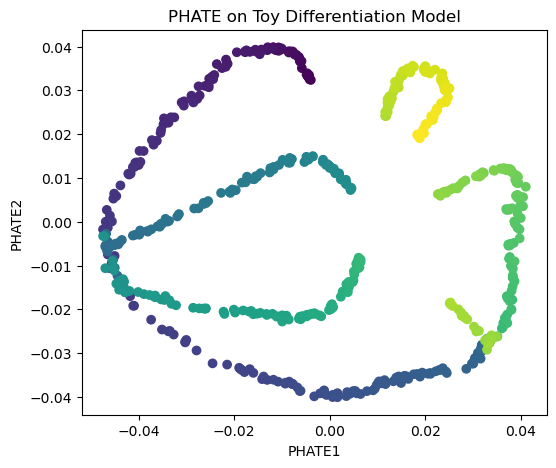

In [ ]:
X_phate = phate_op.fit_transform(complex_3D)

plt.figure(figsize=(6, 5))
plt.scatter(X_phate[:, 0], X_phate[:, 1], c=np.linspace(0, 1, len(complex_3D )), cmap='viridis')
plt.title("PHATE on Toy Differentiation Model")
plt.xlabel("PHATE1")
plt.ylabel("PHATE2")
plt.show()

# 5D data

In [ ]:
np.random.seed(42)

n = 1000  # Points per segment

# Stage 1: Root (progenitor trajectory)
t_root = np.linspace(0, 1, n)
root = np.stack([
    t_root,
    np.zeros_like(t_root),
    np.zeros_like(t_root),
    np.zeros_like(t_root),
    np.zeros_like(t_root)
], axis=1)

# Stage 2: Branch into A, B, C (3 lineages)
t_branch = np.linspace(0, 1, n)

branch_A = np.stack([
    1 + t_branch,
    t_branch,
    t_branch * 0.5,
    np.zeros_like(t_branch),
    np.zeros_like(t_branch)
], axis=1)

branch_B = np.stack([
    1 + t_branch,
    -t_branch,
    -t_branch * 0.5,
    np.zeros_like(t_branch),
    t_branch
], axis=1)

branch_C = np.stack([
    1 + t_branch,
    np.zeros_like(t_branch),
    t_branch,
    t_branch * 0.7,
    -t_branch * 0.3
], axis=1)

# Stage 3: Sub-branches from A → A1 and A2
t_sub = np.linspace(0, 1, n)

branch_A1 = np.stack([
    2 + t_sub,
    t_branch[-1] + t_sub,
    t_branch[-1] * 0.5 + t_sub * 0.3,
    np.zeros_like(t_sub),
    np.zeros_like(t_sub)
], axis=1)

branch_A2 = np.stack([
    2 + t_sub,
    t_branch[-1] - t_sub,
    t_branch[-1] * 0.5 - t_sub * 0.3,
    np.zeros_like(t_sub),
    np.zeros_like(t_sub)
], axis=1)

# Combine everything
X_5D = np.concatenate([root, branch_A, branch_B, branch_C, branch_A1, branch_A2], axis=0)

# Add small Gaussian noise
X_5D += 0.03 * np.random.randn(*X_5D.shape)

# Save labels (useful for coloring or evaluation)
labels = (
    [0]*len(root) +
    [1]*len(branch_A) +
    [2]*len(branch_B) +
    [3]*len(branch_C) +
    [4]*len(branch_A1) +
    [5]*len(branch_A2)
)
labels_5D = np.array(labels)



Calculating PHATE...
  Running PHATE on 6000 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.07 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.39 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.21 seconds.
  Calculated landmark operator in 3.90 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 3.32 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.66 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.16 seconds.
Calculated PHATE in 11.13 seconds.


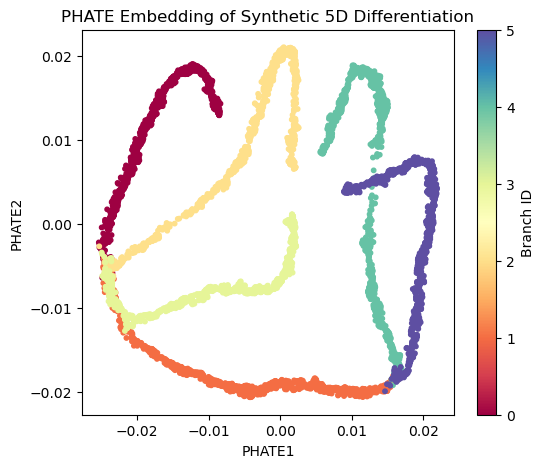

In [ ]:
X_phate = phate_op.fit_transform(X_5D)

plt.figure(figsize=(6, 5))
plt.scatter(X_phate[:, 0], X_phate[:, 1], c=labels_5D, cmap='Spectral', s=10)
plt.title("PHATE Embedding of Synthetic 5D Differentiation")
plt.xlabel("PHATE1")
plt.ylabel("PHATE2")
plt.colorbar(label='Branch ID')
plt.show()

# Data lying on a sphere


In [5]:
import numpy as np
import plotly.graph_objects as go

def random_spherical_noise(center, radius, n):
    """Generate random points near a center point on the sphere."""
    noise = []
    for _ in range(n):
        vec = center + 0.15 * np.random.randn(3)  # small 3D Gaussian noise
        vec /= np.linalg.norm(vec)  # reproject onto sphere
        noise.append(vec)
    return np.array(noise)

def generate_branch(start, direction, steps, arc_length):
    """Generate an arc of points along a branch with some spread."""
    tangent = direction / np.linalg.norm(direction)
    arc = []
    for theta in np.linspace(0, arc_length, steps):
        axis = np.cross(start, tangent)
        axis /= np.linalg.norm(axis)

        # Rodrigues rotation
        point = (start * np.cos(theta) +
                 np.cross(axis, start) * np.sin(theta) +
                 axis * np.dot(axis, start) * (1 - np.cos(theta)))
        point /= np.linalg.norm(point)

        # Add local branch noise
        noise = 0.03 * np.random.randn(3)
        noise -= np.dot(noise, point) * point  # remove radial component
        point += noise
        point /= np.linalg.norm(point)
        arc.append(point)
    return np.array(arc)

# Root cluster
root_center = np.array([0, 0, 1])

root_cluster = random_spherical_noise(root_center, radius=1, n=1500)

# Directions for 3 branches
branch_dirs = [
    np.array([1.5, 1.0, -0.5]),
    np.array([-1.0, 1.0, -0.5]),
    np.array([0.5, -1.5, -0.5])
]

branches = []
terminal_clusters = []
branch_labels = []

for i, dir_vec in enumerate(branch_dirs):
    branch = generate_branch(root_center, dir_vec, steps=600, arc_length=np.pi/2)
    branches.append(branch)
    branch_labels.extend([i + 1] * len(branch))

    # Terminal cluster at end of arc
    term_center = branch[-2]
    terminal = random_spherical_noise(term_center, radius=0.1, n=500)
    terminal_clusters.append(terminal)
    branch_labels.extend([i + 1] * len(terminal))

# Combine all data
X = np.vstack([root_cluster] + branches + terminal_clusters)
labels = np.array([0]*len(root_cluster) + branch_labels)

# Plot
fig = go.Figure(data=go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=X[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=labels,
        colorscale='Viridis',
        opacity=0.9
    )
))
fig.update_layout(
    title='Simulated Differentiation: Root → 3 Branches on Sphere',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)
fig.show()


Calculating PHATE...
  Running PHATE on 4800 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.77 seconds.
    Calculating KMeans...
    Calculated KMeans in 11.59 seconds.
  Calculated landmark operator in 13.76 seconds.
  Calculating optimal t...
    Automatically selected t = 42
  Calculated optimal t in 31.65 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.42 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.00 seconds.
Calculated PHATE in 51.92 seconds.


Text(0.5, 1.0, 'PHATE Embedding Colored by Branch')

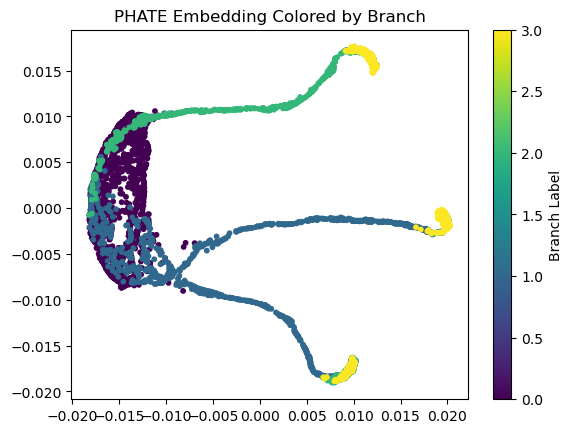

In [8]:
#I am doing an embedding on only the first decision but it may be more useful to consider the whole framework firstly and then color the binary decisions 
phate_op = phate.PHATE(
    random_state=42,
    knn=12,           # slightly larger neighborhood to stabilize the graph
    decay=200,         # good balance of locality
    t='auto',    # high diffusion time for smooth trajectories
)


X_phate = phate_op.fit_transform(X)

plt.scatter(
    X_phate[:, 0], X_phate[:, 1],
    c=labels,  # This should be shape (400,)
    cmap='viridis',
    s=10
)
plt.colorbar(label='Branch Label')
plt.title('PHATE Embedding Colored by Branch')


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

def fit_interpretable_poly_models(X, Y, feature_names=None, degree=3):
    if feature_names is None:
        feature_names = [f'x{i}' for i in range(X.shape[1])]

    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

    # Fit polynomial regression for a and b
    poly_model_a = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model_b = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    poly_model_a.fit(X_train, Y_train[:, 0])
    poly_model_b.fit(X_train, Y_train[:, 1])

    # Predictions on test set
    a_pred_test = poly_model_a.predict(X_test)
    b_pred_test = poly_model_b.predict(X_test)

    # Predictions on train set
    a_pred_train = poly_model_a.predict(X_train)
    b_pred_train = poly_model_b.predict(X_train)

    # Evaluation metrics
    metrics = {
        'mse_a_test': mean_squared_error(Y_test[:, 0], a_pred_test),
        'r2_a_test': r2_score(Y_test[:, 0], a_pred_test),
        'mse_b_test': mean_squared_error(Y_test[:, 1], b_pred_test),
        'r2_b_test': r2_score(Y_test[:, 1], b_pred_test),
        'mse_a_train': mean_squared_error(Y_train[:, 0], a_pred_train),
        'r2_a_train': r2_score(Y_train[:, 0], a_pred_train),
        'mse_b_train': mean_squared_error(Y_train[:, 1], b_pred_train),
        'r2_b_train': r2_score(Y_train[:, 1], b_pred_train)
    }

    # Interpretable feature names and coefficients
    poly = PolynomialFeatures(degree)
    poly.fit(pd.DataFrame(X, columns=feature_names))
    expanded_feature_names = poly.get_feature_names_out(feature_names)

    coef_a = poly_model_a.named_steps['linearregression'].coef_
    intercept_a = poly_model_a.named_steps['linearregression'].intercept_

    coef_b = poly_model_b.named_steps['linearregression'].coef_
    intercept_b = poly_model_b.named_steps['linearregression'].intercept_

    formula_a = pd.Series(coef_a, index=expanded_feature_names)
    formula_b = pd.Series(coef_b, index=expanded_feature_names)

    return {
        'model_a': poly_model_a,
        'model_b': poly_model_b,
        'a_pred_test': a_pred_test,
        'b_pred_test': b_pred_test,
        'a_pred_train': a_pred_train,
        'b_pred_train': b_pred_train,
        'metrics': metrics,
        'formula_a': formula_a,
        'intercept_a': intercept_a,
        'formula_b': formula_b,
        'intercept_b': intercept_b,
        'feature_names': expanded_feature_names,
        'X_train': X_train,
        'Y_train': Y_train,
        'X_test': X_test,
        'Y_test': Y_test
    }


In [12]:
Y = X_phate

result = fit_interpretable_poly_models(X, Y, feature_names=[ 'x', 'y', 'z'], degree=8)

# Print test scores
print("R² on test (a):", result['metrics']['r2_a_test'])
print("R² on test (b):", result['metrics']['r2_b_test'])
print("R² on train (a):", result['metrics']['r2_a_train'])
print("R² on train (b):", result['metrics']['r2_b_train'])

# Print interpretable formula
print(result['formula_a'].sort_values(ascending=False).head())



R² on test (a): 0.9988024088751615
R² on test (b): 0.998554835283838
R² on train (a): 0.9988822885739793
R² on train (b): 0.9988028244607757
x y^2        9.013516e+08
x z^2        7.731527e+08
x^3          7.659105e+08
x^3 z^2      3.905345e+08
x y^2 z^2    2.766581e+08
dtype: float64


In [13]:
# Re-import necessary libraries after code state reset
import numpy as np
import matplotlib.pyplot as plt

# Dummy placeholder for PHATE embedding, assuming ~80k points with 2D coordinates
phate_embedding_dummy = np.random.rand(79969, 2)

def plot_poly_vs_phate(result, phate_embedding, sample_size=5000):
    """
    Compare the polynomial model predictions with PHATE embeddings.

    Parameters:
    - result: output from fit_interpretable_poly_models
    - phate_embedding: true PHATE 2D coordinates, shape (n_samples, 2)
    - sample_size: number of points to plot for readability
    """
    # Reconstruct full predictions on all X
    X_full = np.vstack((result['X_train'], result['X_test']))
    a_full = np.concatenate((result['a_pred_train'], result['a_pred_test']))
    b_full = np.concatenate((result['b_pred_train'], result['b_pred_test']))
    Y_pred_full = np.vstack((a_full, b_full)).T

    # Randomly sample indices to avoid overcrowded plots
    indices = np.random.choice(len(X_full), size=min(sample_size, len(X_full)), replace=False)

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    axs[0].scatter(phate_embedding[indices, 0], phate_embedding[indices, 1], alpha=0.6, s=10)
    axs[0].set_title("Original PHATE embedding")
    axs[0].set_xlabel("PHATE 1")
    axs[0].set_ylabel("PHATE 2")

    axs[1].scatter(Y_pred_full[indices, 0], Y_pred_full[indices, 1], alpha=0.6, s=10, color='green')
    axs[1].set_title("Polynomial Regression Approximation")
    axs[1].set_xlabel("Predicted a")
    axs[1].set_ylabel("Predicted b")

    plt.tight_layout()
    plt.show()


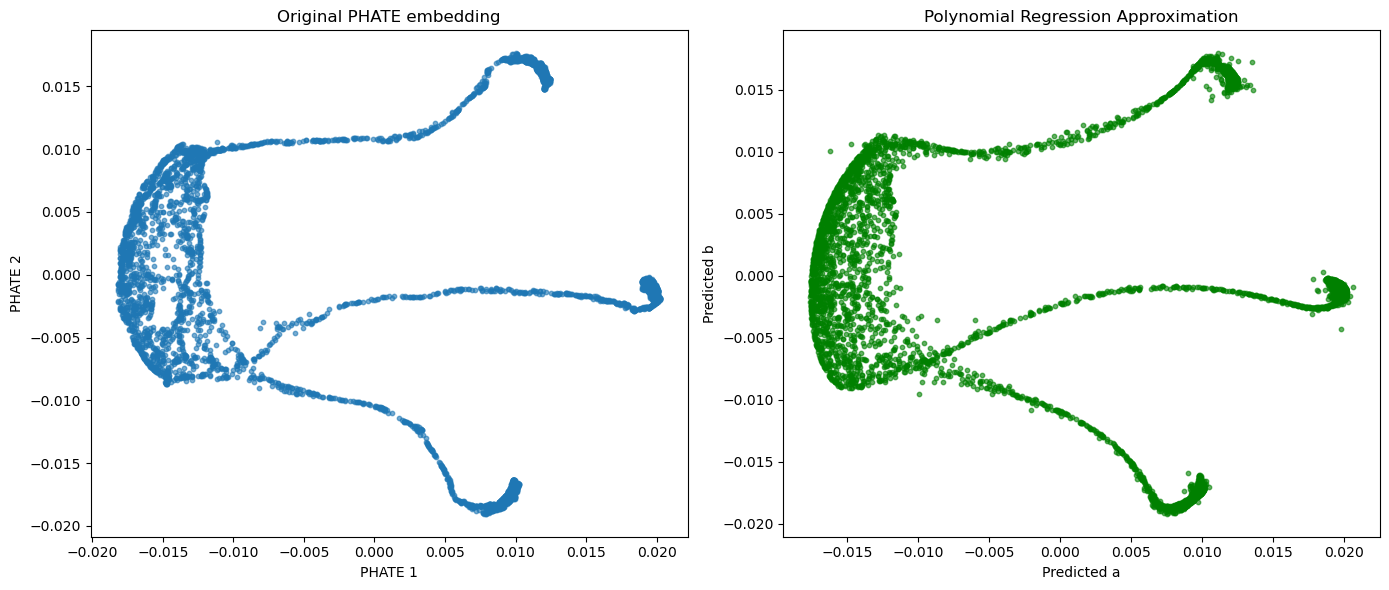

In [14]:
plot_poly_vs_phate(result, Y)